In [2]:
import aux
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer, AutoTokenizer, DataCollatorForTokenClassification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from kingbert import KingBert

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
test = aux.json_to_Dataset("data/distilbert_test.json")

In [7]:
data = [i for i in test]

In [3]:
model = AutoModelForTokenClassification.from_pretrained('distilbert_finetuned')
tokenizer = AutoTokenizer.from_pretrained('distilbert_finetuned')

In [5]:
res = aux.compute_all_metrics(model, data)
print(res)

Inference Progress: 100%|██████████| 4811/4811 [02:53<00:00, 27.70it/s]


{'precision': 0.8408610567514677, 'recall': 0.8688126819799418, 'f1': 0.8546083774215363, 'accuracy': 0.9854433780804444, 'confusion_matrix': array([[ 889,   36,    0, ...,    0,    0,    0],
       [  11,  942,    0, ...,    0,    0,    0],
       [   0,    0, 1266, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0, 3121,    0],
       [   0,    0,    0, ...,    0,    0,  396]])}


In [6]:
conf = np.log(res['confusion_matrix'] + 0.01)

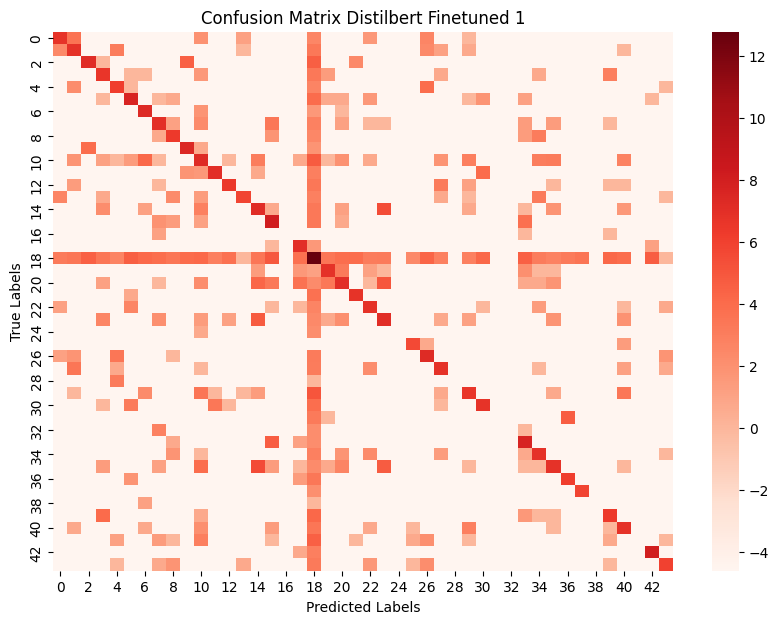

In [7]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Distilbert Finetuned 1')
plt.show()


In [8]:
model = AutoModelForTokenClassification.from_pretrained('distilbert_finetuned2')
tokenizer = AutoTokenizer.from_pretrained('distilbert_finetuned2')

In [9]:
res = aux.compute_all_metrics(model, data)
print(res)

Inference Progress: 100%|██████████| 4811/4811 [03:27<00:00, 23.20it/s]


{'precision': 0.6049911399881867, 'recall': 0.6627305079262374, 'f1': 0.6325459317585301, 'accuracy': 0.9642173775480993, 'confusion_matrix': array([[ 735,  138,    0, ...,    0,    0,    0],
       [ 290,  553,    0, ...,    0,    0,    0],
       [   0,    0, 1102, ...,    0,    0,    0],
       ...,
       [   1,    1,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, 3132,    0],
       [   4,    0,    0, ...,    0,    0,   24]])}


In [10]:
conf = np.log(res['confusion_matrix'] + 0.01)

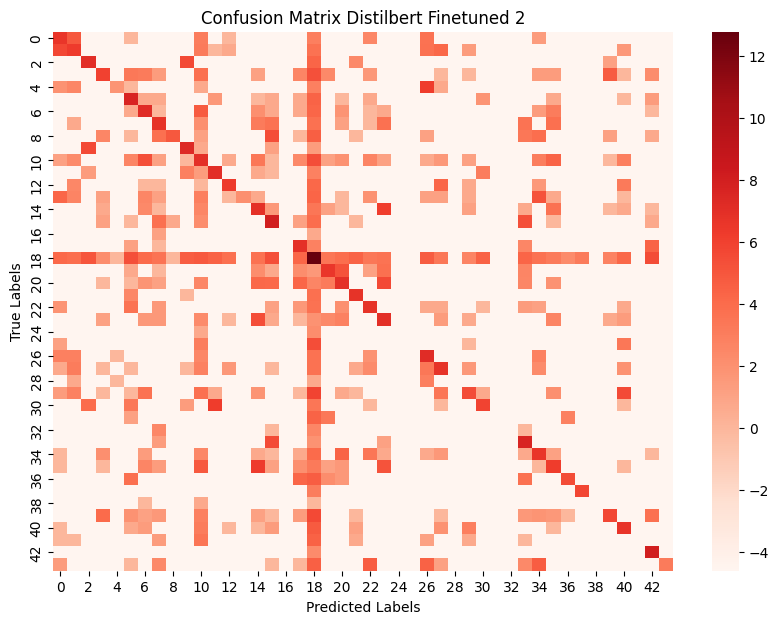

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Distilbert Finetuned 2')
plt.show()


In [28]:
test = aux.json_to_Dataset("data/albert_test.json")

In [29]:
data = [i for i in test]

In [30]:
model = AutoModelForTokenClassification.from_pretrained('albert_finetuned')
tokenizer = AutoTokenizer.from_pretrained('albert_finetuned')

In [15]:
res = aux.compute_all_metrics(model, data)
print(res)

Inference Progress: 100%|██████████| 4811/4811 [09:04<00:00,  8.83it/s]


{'precision': 0.8581946348149598, 'recall': 0.8862018764153995, 'f1': 0.8719734198117899, 'accuracy': 0.9870027144640001, 'confusion_matrix': array([[ 898,   57,    0, ...,    0,    0,    0],
       [   4,  980,    0, ...,    0,    0,    0],
       [   0,    0, 1297, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    5,    0,    0],
       [   0,    0,    0, ...,    0, 3121,    0],
       [   0,    0,    0, ...,    0,    0,  392]])}


In [16]:
conf = np.log(res['confusion_matrix'] + 0.01)

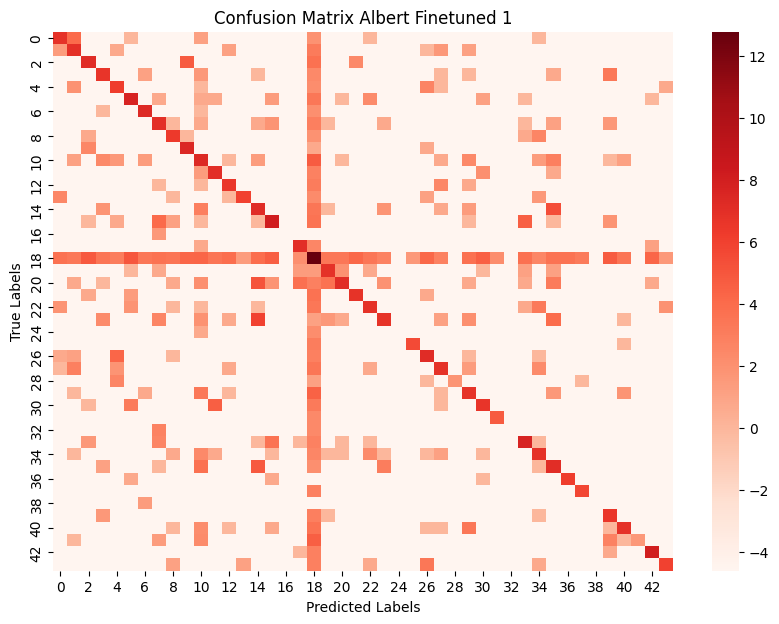

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Albert Finetuned 1')
plt.show()


In [18]:
model = AutoModelForTokenClassification.from_pretrained('albert_finetuned2')
tokenizer = AutoTokenizer.from_pretrained('albert_finetuned2')

In [19]:
res = aux.compute_all_metrics(model, data)
print(res)

Inference Progress: 100%|██████████| 4811/4811 [08:18<00:00,  9.65it/s]


{'precision': 0.8098415671583548, 'recall': 0.8392510514396635, 'f1': 0.8242840687929459, 'accuracy': 0.9826937225822814, 'confusion_matrix': array([[ 904,   36,    0, ...,    0,    0,    1],
       [  41,  931,    0, ...,    0,    0,    0],
       [   0,    0, 1106, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, 3090,    0],
       [   0,    0,    0, ...,    0,    0,  376]])}


In [20]:
conf = np.log(res['confusion_matrix'] + 0.01)

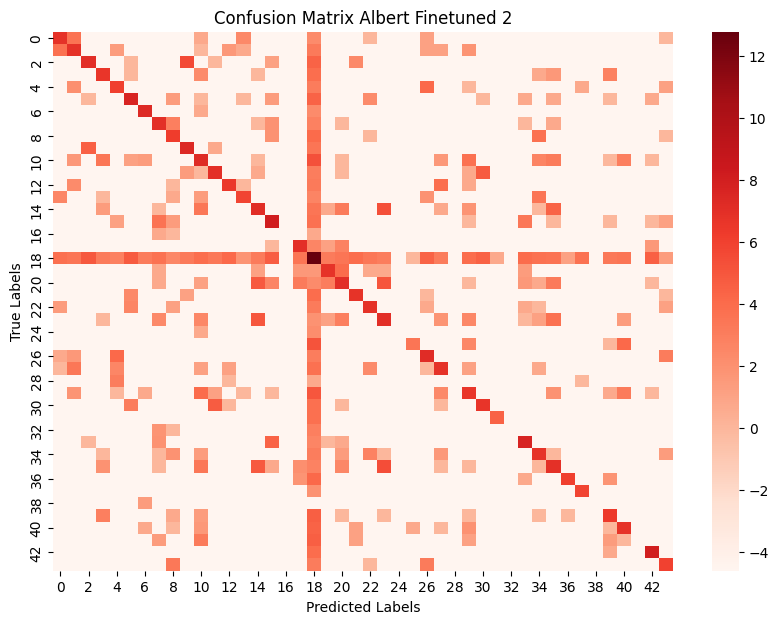

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Albert Finetuned 2')
plt.show()


In [2]:
distilbert_tuned = AutoModelForTokenClassification.from_pretrained('distilbert_finetuned')
albert_tuned = AutoModelForTokenClassification.from_pretrained('albert_finetuned')

In [3]:
model = KingBert(distilbert_tuned=distilbert_tuned, albert_tuned=albert_tuned)
state_dict = torch.load('model_state.pth')
model.load_state_dict(state_dict)
model.eval()

KingBert(
  (distilbert): DistilBertForTokenClassification(
    (distilbert): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (ffn)

In [4]:
dataset = aux.json_to_Dataset_ensemble("data/ensemble_test.json")

In [5]:
data = [i for i in dataset]

In [6]:
res = aux.compute_ensemble_metrics(model, data)
print(res)

Inference Progress:   0%|          | 0/4811 [00:00<?, ?it/s]

/Users/andreafabbricatore/Desktop/mac_bocconi/year 3/semester 2/AI/project/aux.py:195: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  stacked_tensors1 = torch.stack([torch.tensor(i) for i in output1])
/Users/andreafabbricatore/Desktop/mac_bocconi/year 3/semester 2/AI/project/aux.py:198: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  stacked_tensors2 = torch.stack([torch.tensor(i) for i in output2])
Inference Progress: 100%|██████████| 4811/4811 [12:52<00:00,  6.22it/s]


{'precision': 0.362339514978602, 'recall': 0.400825443068706, 'f1': 0.3806120684686761, 'accuracy': 0.9289493972926786, 'confusion_matrix': array([[ 698,   23,    0, ...,    0,    0,    0],
       [   2,  633,    0, ...,    0,    0,    0],
       [   0,    0, 1024, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, 2774,    0],
       [   0,    0,    0, ...,    0,    0,  169]])}


In [7]:
conf = np.log(res['confusion_matrix'] + 0.01)

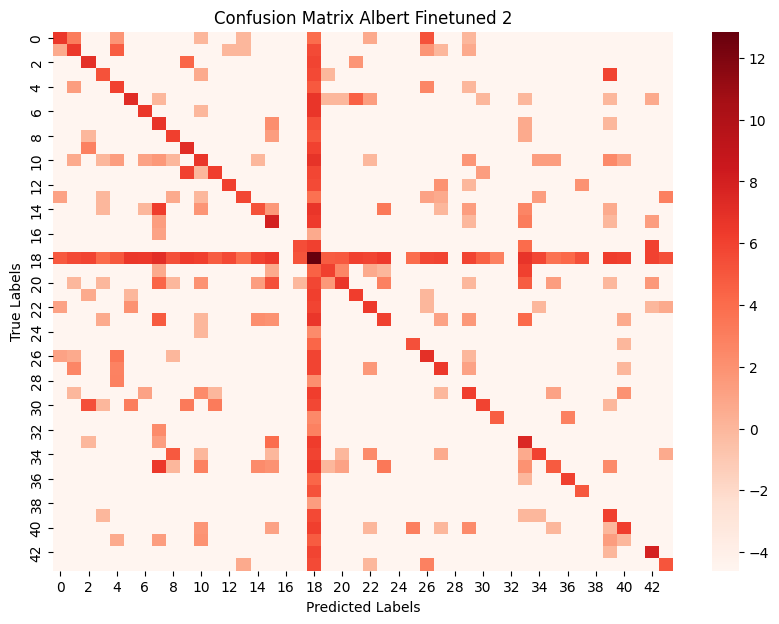

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Albert Finetuned 2')
plt.show()


In [9]:
model.alpha

Parameter containing:
tensor([0.4907, 0.4945, 0.4919, 0.4972, 0.4967, 0.4990, 0.4901, 0.5096, 0.5077,
        0.5033, 0.4978, 0.5015, 0.4995, 0.4989, 0.5001, 0.5130, 0.4643, 0.5121,
        0.5070, 0.4989, 0.5061, 0.4994, 0.5026, 0.5014, 0.4658, 0.4759, 0.5043,
        0.5021, 0.4919, 0.4944, 0.4989, 0.4870, 0.4564, 0.5059, 0.4918, 0.5013,
        0.4721, 0.4888, 0.4612, 0.4973, 0.4978, 0.4986, 0.4681, 0.5132, 0.5090,
        0.4583, 0.4603], requires_grad=True)